In [143]:
output_file_path = "trajectory300.xyz"
trajectories = {}
current_timestep = None
atom_data = []
numer_of_selected_atoms = 3057
total_time_steps_limit = 200000
offset_time_stps = 0
lines = []
count = 0
sample_time_sacle = 100
fs = 1 

with open(output_file_path, 'r') as file:
    count = 0
    for line in file:
        if "ITEM: TIMESTEP" in line and count == 0:
            lines.append(line)
            for line in file:
                if "ITEM: NUMBER OF ATOMS" in line:
                    count += sample_time_sacle
                    break
                lines.append(line)
        elif "ITEM: TIMESTEP" in line and count > total_time_steps_limit - sample_time_sacle:
            for line in file:
                if "ITEM: NUMBER OF ATOMS" in line:
                    count += sample_time_sacle
                    break
                lines.append(line)
        elif count <= total_time_steps_limit - sample_time_sacle:
            
            if "ITEM: TIMESTEP" in line:
                #lines.append(line)
                count += sample_time_sacle
            #if count % (fs*sample_time_sacle) == 5:        
            lines.append(line)


            #if "ITEM: TIMESTEP" in line:
            #    count += sample_time_sacle
            #lines.append(line)

        #    break
        #elif count < total_time_steps_limit - sample_time_sacle:
        #    lines.append(line)
        #    count += sample_time_sacle

for i, line in enumerate(lines):
    #print("1!",i)
    if line.startswith("ITEM: NUMBER OF ATOMS"):
        num_atoms = int(lines[i+1])
    if line.startswith("ITEM: TIMESTEP"):
        current_timestep = int(lines[i + 1].strip())

        if current_timestep is not None and current_timestep % (fs*sample_time_sacle) == 0:
            trajectories[current_timestep] = atom_data
            atom_data = []
        print(current_timestep)
        #if current_timestep > total_time_steps_limit + offset_time_stps:
        #    break
    elif line.startswith("ITEM: ATOMS"):
        # Skip the header line
        #num_atoms = num_molecules*3#int(lines[i + 1].split()[-1])
        #num_atoms = 2994
        #print(num_atoms)
        num_atoms = numer_of_selected_atoms

        for j in range(num_atoms):
            #print(lines[i+j+1])
            atom_id, atom_type, x, y, z = lines[i+j+1].split()
            #print(atom_id,atom_type,x,y,z)
            atom_data.append((atom_id, atom_type, x, y, z))
        i += 1

if current_timestep is not None:
    trajectories[current_timestep] = atom_data

# Print atom positions for each timestep
#time_step_vec = []
#for timestep, atom_data in trajectories.items():
#    print(f"TIMESTEP {timestep}")
    #for atom_id, atom_type, x, y, z in atom_data:
        #print(f"{atom_id} {atom_type} {x} {y} {z}")
#    time_step_vec.append(timestep)
        
atom_data_dict = trajectories
file.close()

['ITEM: TIMESTEP\n', '0\n', '3057\n', 'ITEM: BOX BOUNDS pp pp pp\n', '0.0000000000000000e+00 3.1000000000000000e+01\n', '0.0000000000000000e+00 3.1000000000000000e+01\n', '0.0000000000000000e+00 3.1000000000000000e+01\n', 'ITEM: ATOMS id type x y z\n', '1 1 2.48236 30.5712 1.77737\n', '2 2 3.41357 30.8354 1.52628\n']
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
1

130300
130400
130500
130600
130700
130800
130900
131000
131100
131200
131300
131400
131500
131600
131700
131800
131900
132000
132100
132200
132300
132400
132500
132600
132700
132800
132900
133000
133100
133200
133300
133400
133500
133600
133700
133800
133900
134000
134100
134200
134300
134400
134500
134600
134700
134800
134900
135000
135100
135200
135300
135400
135500
135600
135700
135800
135900
136000
136100
136200
136300
136400
136500
136600
136700
136800
136900
137000
137100
137200
137300
137400
137500
137600
137700
137800
137900
138000
138100
138200
138300
138400
138500
138600
138700
138800
138900
139000
139100
139200
139300
139400
139500
139600
139700
139800
139900
140000
140100
140200
140300
140400
140500
140600
140700
140800
140900
141000
141100
141200
141300
141400
141500
141600
141700
141800
141900
142000
142100
142200
142300
142400
142500
142600
142700
142800
142900
143000
143100
143200
143300
143400
143500
143600
143700
143800
143900
144000
144100
144200
144300
144400
144500

In [144]:
import numpy as np


# Convert the atom data dictionary to a NumPy array for faster computation
atom_data_array = {}
box_size = 31
Equi_time_steps = offset_time_stps
Prod_time_steps = total_time_steps_limit
time_step_max = Equi_time_steps + Prod_time_steps 
#Correct coordinates
def pbc(x,box_size):
    x = x - box_size*np.round(x/box_size)
    return x





for timestep, atom_list in atom_data_dict.items():
    #print(timestep,atom_list[1])
    atom_data_array[timestep] = np.array([[item for item in atom] for atom in atom_list])

# Dictionary to store dipole vectors for each time step
dipole_vectors = {}

whole_timesteps = []

# Loop through each time step and calculate dipole vectors using NumPy
for timestep, atom_array in atom_data_array.items():
    
    print(timestep)
    if len(atom_array) == 0:
        continue
    #print(atom_array)
    if timestep % 100 == 0:
        print(timestep)
    atom_array = np.array(atom_array)
    #print(atom_array)
    o_indices = np.where((atom_array[:, 1] == '1'))[0]# & (np.float(atom_array[:, 2]) < 10) & (np.float(atom_array[:, 2]) > -10) & (np.float(atom_array[:, 3]) < 10) & (np.float(atom_array[:, 3]) > -10) & (np.float(atom_array[:, 4]) < 10) & (np.float(atom_array[:, 4]) > -10))[0] 
    o_atoms = atom_array[o_indices, 2:].astype(float)
    h1_atoms = atom_array[o_indices + 1, 2:].astype(float)
    h2_atoms = atom_array[o_indices + 2, 2:].astype(float)
    
    
    oh1 = o_atoms - h1_atoms
    oh2 = o_atoms - h2_atoms
    oh1 = pbc(oh1, box_size)
    oh2 = pbc(oh2, box_size)
    
    # Calculate dipole vectors with the adjusted charge for oxygen
    #dipole_vector = oh1 + oh2#h1_atoms + h2_atoms - 2 * o_atoms
    #print(dipole_vector)

    dipole_vectors[timestep] = oh1 + oh2#dipole_vector/2
    #print(len(dipole_vectors[timestep]))
    #print(len(oh1 + oh2))
# Print dipole vectors for each time step
#for timestep, vectors in dipole_vectors.items():
#    print(f"Time step {timestep}:")
#    for vector in vectors:
#       print(f"Dipole vector: {vector}")
        
        


0
100
100
200
200
300
300
400
400
500
500
600
600
700
700
800
800
900
900
1000
1000
1100
1100
1200
1200
1300
1300
1400
1400
1500
1500
1600
1600
1700
1700
1800
1800
1900
1900
2000
2000
2100
2100
2200
2200
2300
2300
2400
2400
2500
2500
2600
2600
2700
2700
2800
2800
2900
2900
3000
3000
3100
3100
3200
3200
3300
3300
3400
3400
3500
3500
3600
3600
3700
3700
3800
3800
3900
3900
4000
4000
4100
4100
4200
4200
4300
4300
4400
4400
4500
4500
4600
4600
4700
4700
4800
4800
4900
4900
5000
5000
5100
5100
5200
5200
5300
5300
5400
5400
5500
5500
5600
5600
5700
5700
5800
5800
5900
5900
6000
6000
6100
6100
6200
6200
6300
6300
6400
6400
6500
6500
6600
6600
6700
6700
6800
6800
6900
6900
7000
7000
7100
7100
7200
7200
7300
7300
7400
7400
7500
7500
7600
7600
7700
7700
7800
7800
7900
7900
8000
8000
8100
8100
8200
8200
8300
8300
8400
8400
8500
8500
8600
8600
8700
8700
8800
8800
8900
8900
9000
9000
9100
9100
9200
9200
9300
9300
9400
9400
9500
9500
9600
9600
9700
9700
9800
9800
9900
9900
10000
10000
10100
10100
10

72200
72200
72300
72300
72400
72400
72500
72500
72600
72600
72700
72700
72800
72800
72900
72900
73000
73000
73100
73100
73200
73200
73300
73300
73400
73400
73500
73500
73600
73600
73700
73700
73800
73800
73900
73900
74000
74000
74100
74100
74200
74200
74300
74300
74400
74400
74500
74500
74600
74600
74700
74700
74800
74800
74900
74900
75000
75000
75100
75100
75200
75200
75300
75300
75400
75400
75500
75500
75600
75600
75700
75700
75800
75800
75900
75900
76000
76000
76100
76100
76200
76200
76300
76300
76400
76400
76500
76500
76600
76600
76700
76700
76800
76800
76900
76900
77000
77000
77100
77100
77200
77200
77300
77300
77400
77400
77500
77500
77600
77600
77700
77700
77800
77800
77900
77900
78000
78000
78100
78100
78200
78200
78300
78300
78400
78400
78500
78500
78600
78600
78700
78700
78800
78800
78900
78900
79000
79000
79100
79100
79200
79200
79300
79300
79400
79400
79500
79500
79600
79600
79700
79700
79800
79800
79900
79900
80000
80000
80100
80100
80200
80200
80300
80300
80400
80400
8050

136500
136500
136600
136600
136700
136700
136800
136800
136900
136900
137000
137000
137100
137100
137200
137200
137300
137300
137400
137400
137500
137500
137600
137600
137700
137700
137800
137800
137900
137900
138000
138000
138100
138100
138200
138200
138300
138300
138400
138400
138500
138500
138600
138600
138700
138700
138800
138800
138900
138900
139000
139000
139100
139100
139200
139200
139300
139300
139400
139400
139500
139500
139600
139600
139700
139700
139800
139800
139900
139900
140000
140000
140100
140100
140200
140200
140300
140300
140400
140400
140500
140500
140600
140600
140700
140700
140800
140800
140900
140900
141000
141000
141100
141100
141200
141200
141300
141300
141400
141400
141500
141500
141600
141600
141700
141700
141800
141800
141900
141900
142000
142000
142100
142100
142200
142200
142300
142300
142400
142400
142500
142500
142600
142600
142700
142700
142800
142800
142900
142900
143000
143000
143100
143100
143200
143200
143300
143300
143400
143400
143500
143500
143600

198100
198100
198200
198200
198300
198300
198400
198400
198500
198500
198600
198600
198700
198700
198800
198800
198900
198900
199000
199000
199100
199100
199200
199200
199300
199300
199400
199400
199500
199500
199600
199600
199700
199700
199800
199800
200000


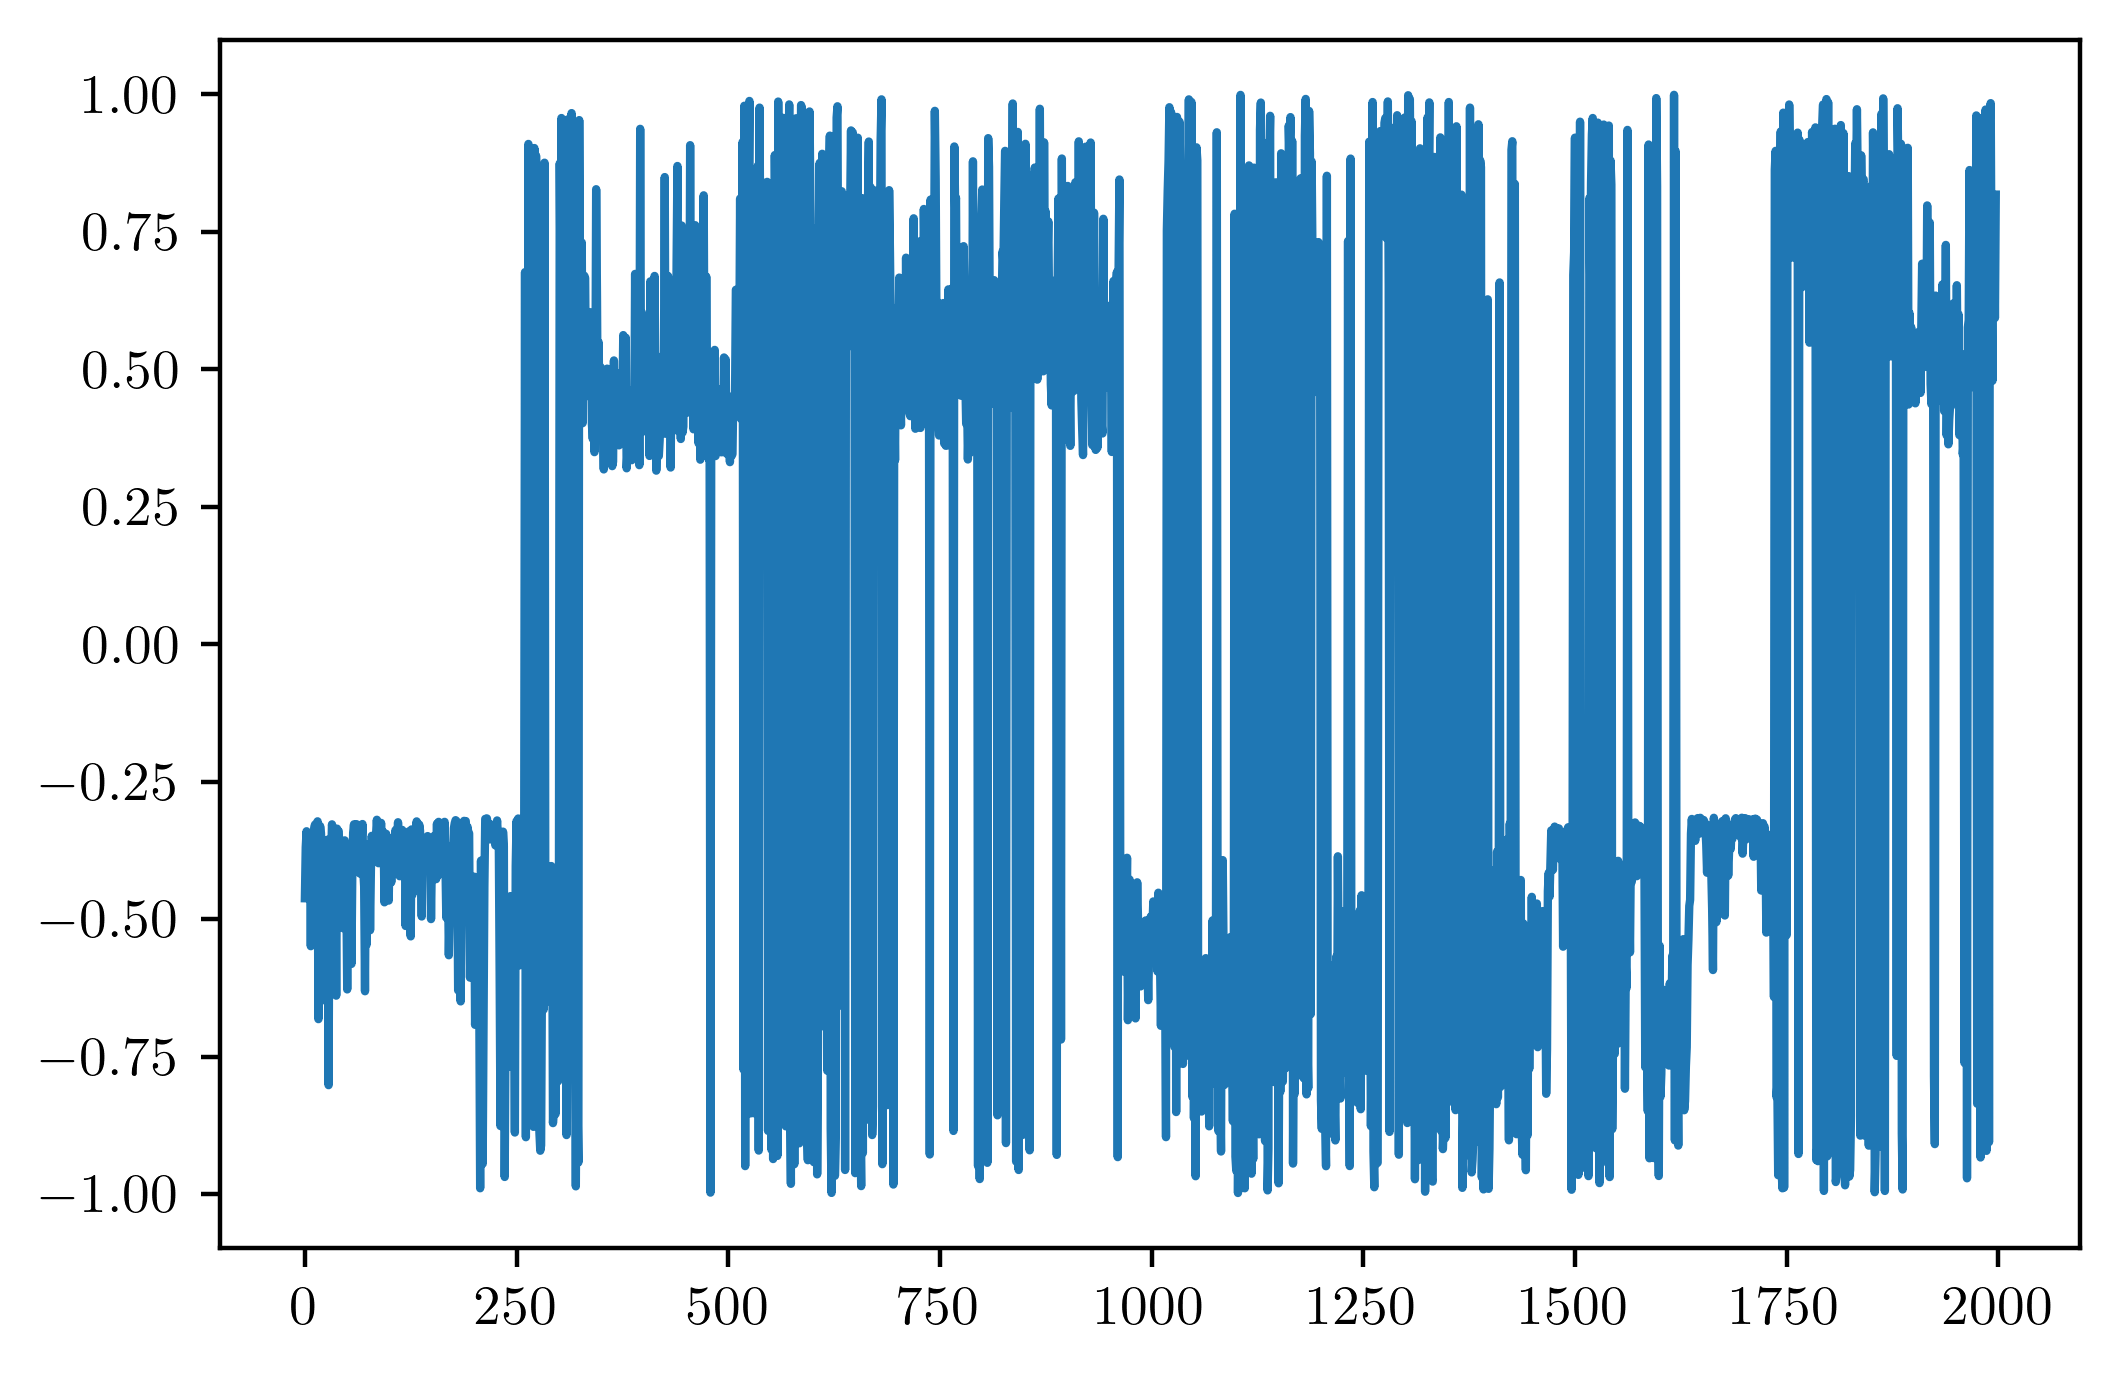

In [169]:
ts = dipole_vectors.keys()
dp = []
dpx = []
dpy = []
dpz = []
for item in ts:
    dp.append(dipole_vectors[item][0])
    
for item in dp:
    dpx.append(item[0])
for item in dp:
    dpy.append(item[1])
#for item in dp:
#    dpz.append(item[2])
    
plt.plot(np.multiply(np.sign(dpx),np.exp(-np.abs(dpx))))
#plt.plot(dpx)
#plt.hist(np.sqrt(dpx**2+dpy**2+dpz**2))

(array([269., 136., 164., 198., 266., 297., 222., 198., 153.,  95.]),
 array([-1.15338e+00, -9.22727e-01, -6.92074e-01, -4.61421e-01,
        -2.30768e-01, -1.15000e-04,  2.30538e-01,  4.61191e-01,
         6.91844e-01,  9.22497e-01,  1.15315e+00]),
 <BarContainer object of 10 artists>)

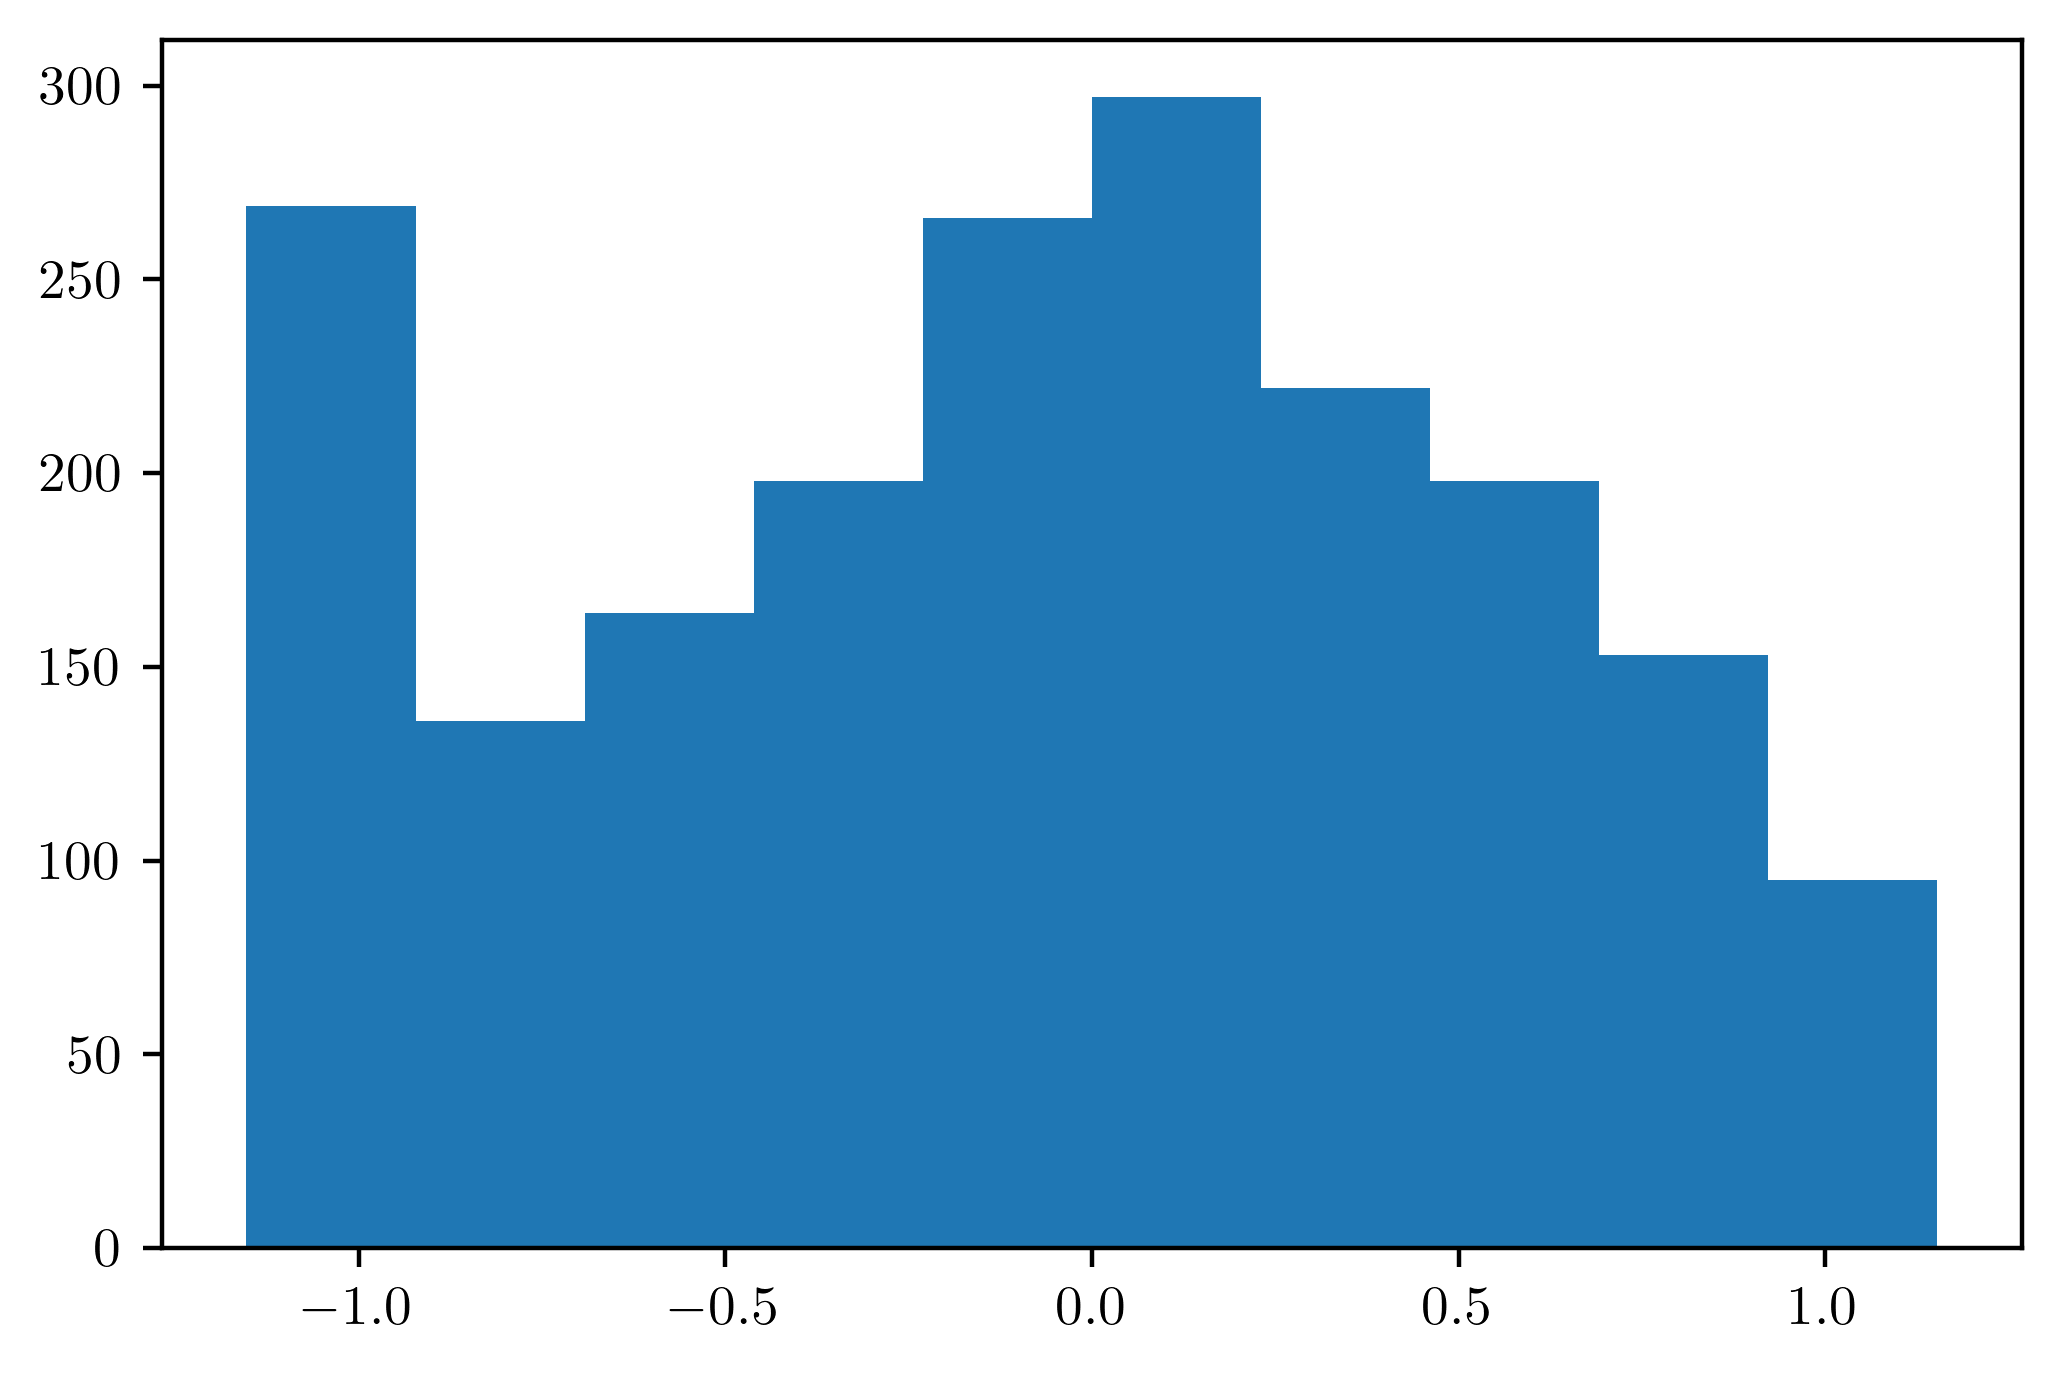

In [158]:
plt.hist(dpx)

In [149]:
dipole_vectors.keys()

dict_keys([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900, 6000, 6100, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100, 7200, 7300, 7400, 7500, 7600, 7700, 7800, 7900, 8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900, 9000, 9100, 9200, 9300, 9400, 9500, 9600, 9700, 9800, 9900, 10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700, 11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600, 12700, 12800, 12900, 13000, 13100, 13200, 13300, 13400, 13500, 13600, 13700, 13800, 13900, 14000, 14100, 14200, 14300, 14400, 14500, 14600, 14700, 14800, 14900, 15000, 15100, 15200, 15300, 15400, 15500, 15600, 15700

In [134]:
dipole_matrix = np.array([dipole_vectors[ts] for ts in dipole_vectors.keys()])
dipole_concat = np.concatenate(dipole_matrix)
dipole_concat

array([[ 0.907813, -0.608512, -0.37277 ],
       [-0.76303 ,  0.4785  , -0.72254 ],
       [ 0.5384  ,  0.65623 ,  0.78291 ],
       ...,
       [ 0.9096  , -0.0174  , -0.7111  ],
       [-0.1205  , -0.00565 , -1.1485  ],
       [-0.8118  ,  0.1115  , -0.8137  ]])

In [10]:
dipole_matrix

array([[[ 0.805377, -0.147728, -0.8142  ],
        [-1.13306 , -0.0651  ,  0.213061],
        [ 0.5237  ,  0.86645 , -0.5553  ],
        ...,
        [-0.1044  ,  1.1293  ,  0.21756 ],
        [-0.5128  ,  0.49997 , -0.9058  ],
        [ 0.2602  ,  0.9641  , -0.5798  ]]])

In [135]:
dipole_matrix = np.reshape(dipole_matrix,(len(dipole_vectors.keys()),-1,3))

N_step = np.shape(dipole_matrix)[0]
N_atom = np.shape(dipole_matrix)[1]

print(N_step)

1998


# Case1:  correlation terms, cross correlations are excluded.

## $C(\tau) = \sum_{i,j}\langle\vec{dp}_i(t_0)\cdot \vec{dp}_j(t_0+\tau) \rangle \delta_{ij}$

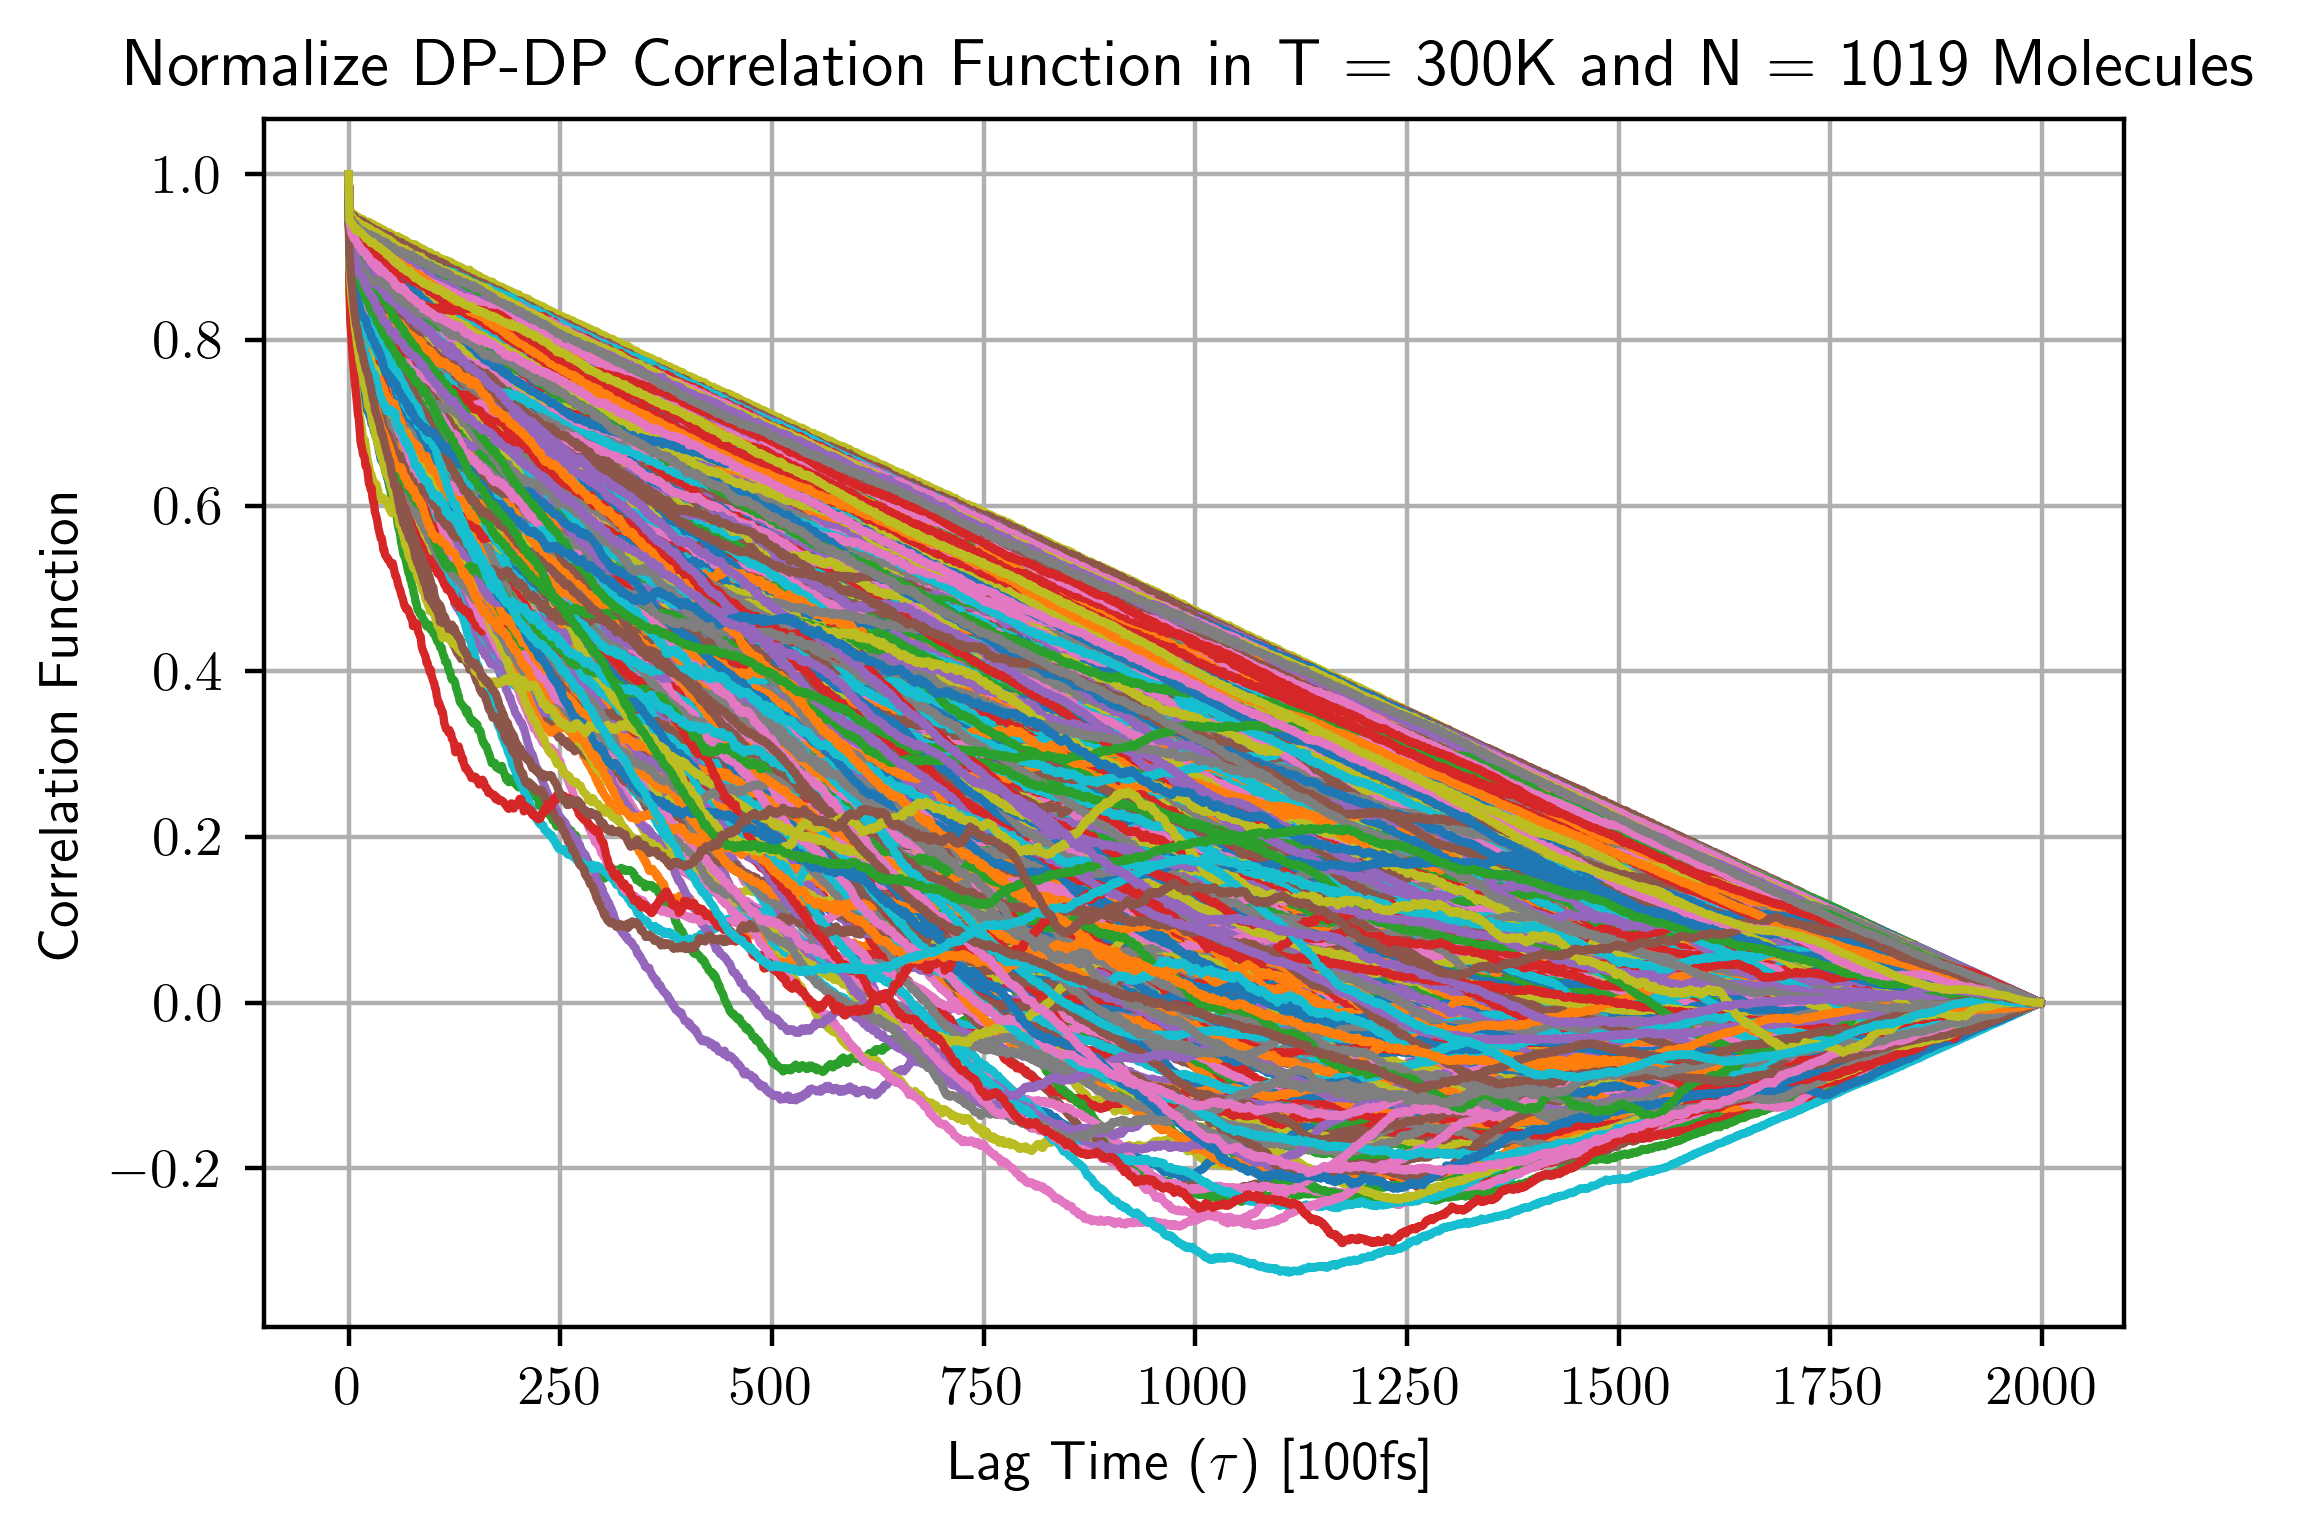

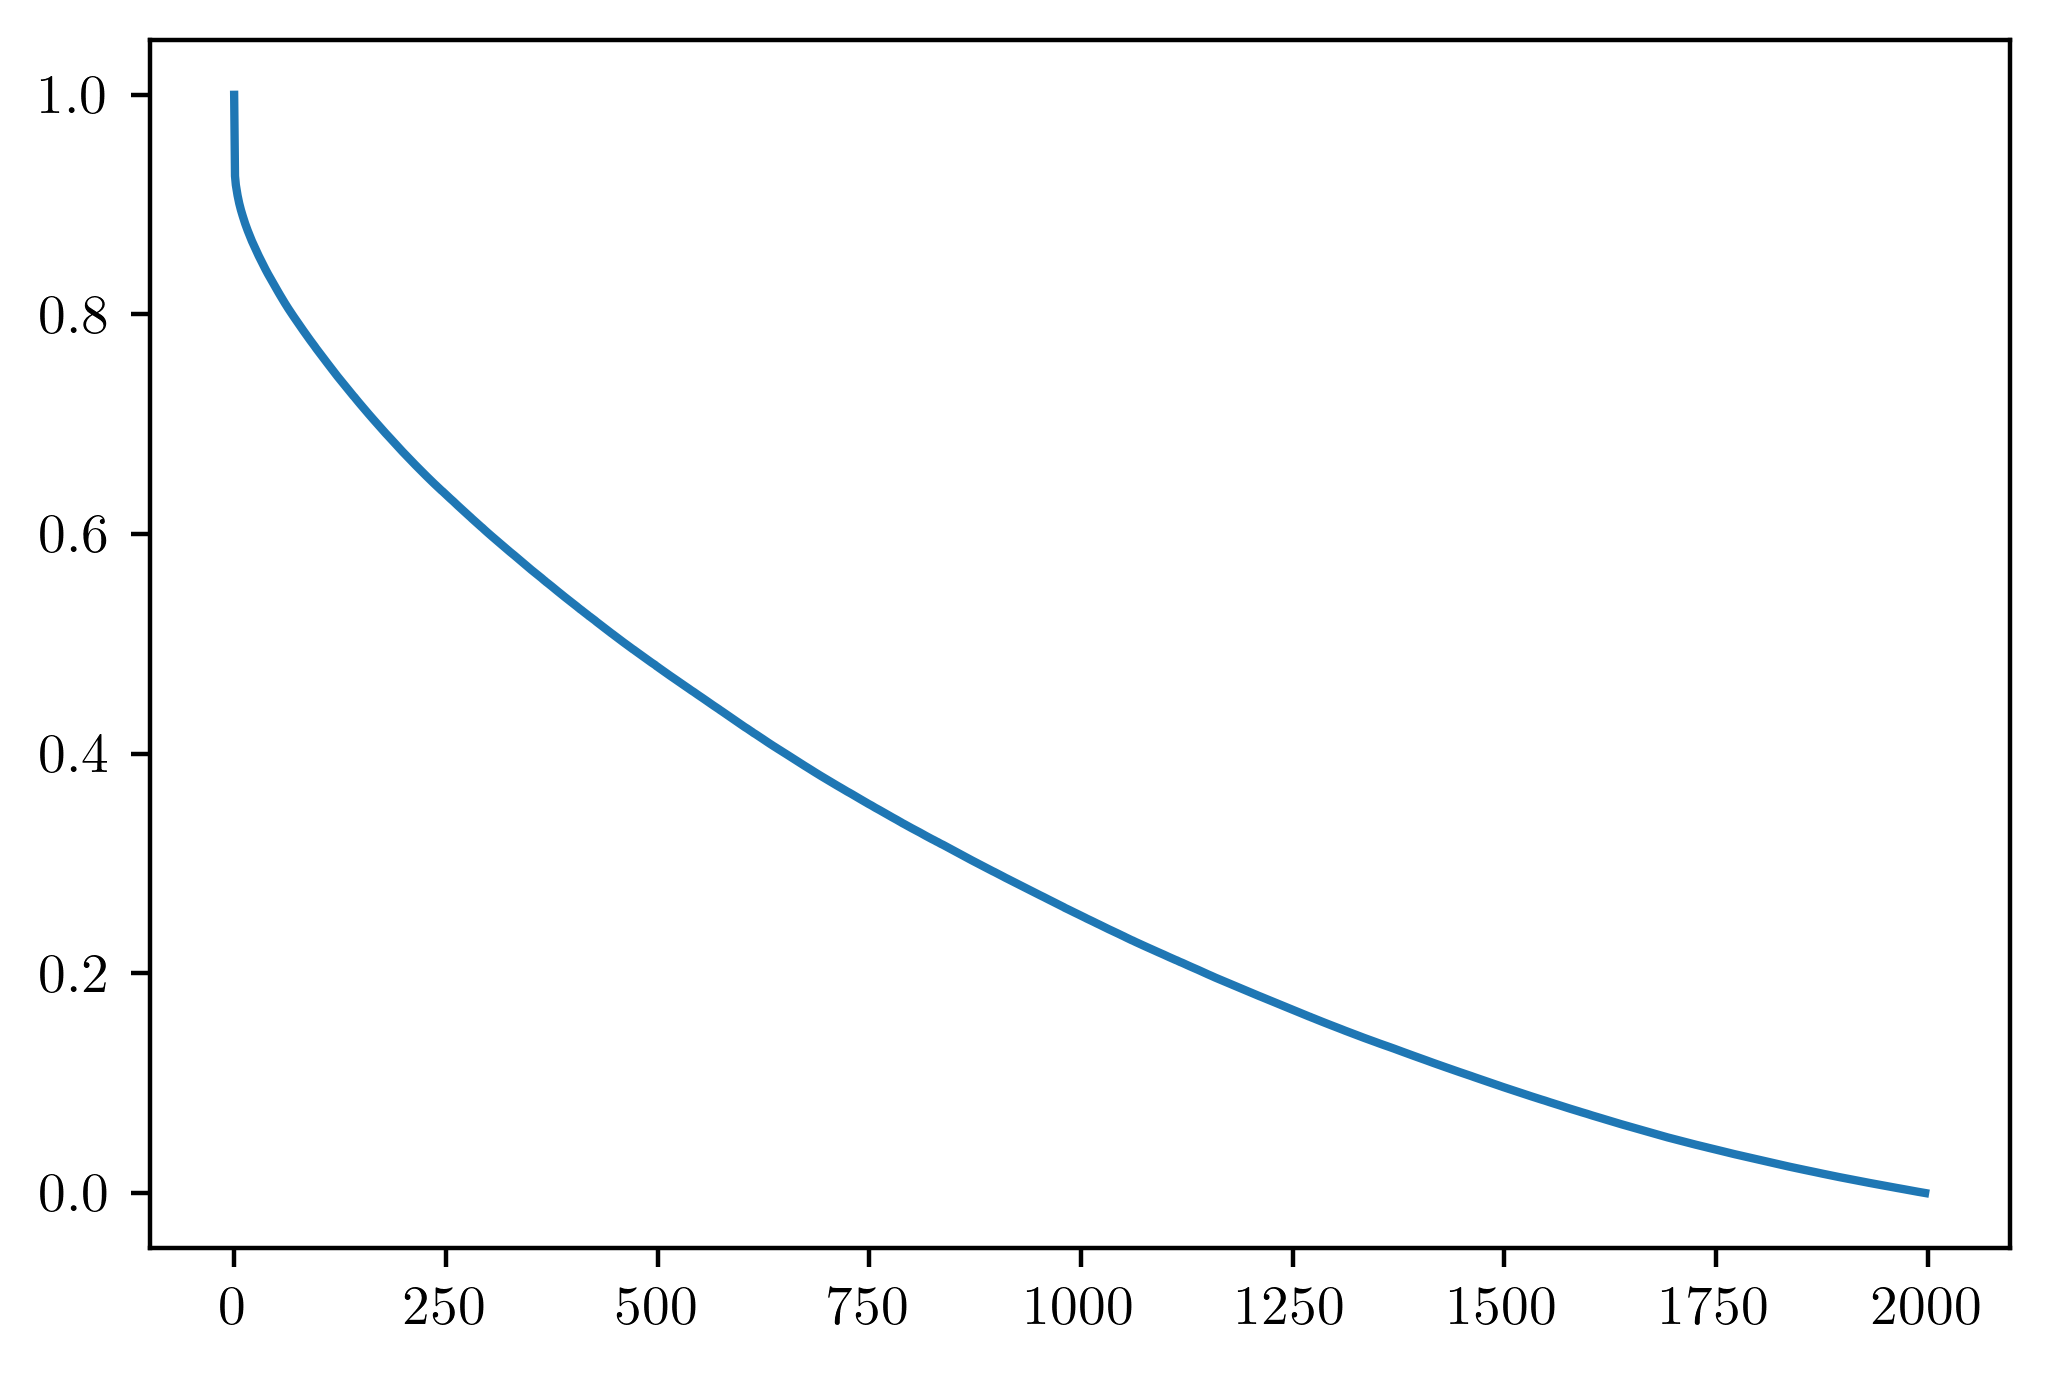

In [182]:
from scipy.signal import correlate
import matplotlib.pyplot as plt

corr_atom = np.zeros((N_atom,N_step))
t_zero = np.zeros((N_atom,))

for i in range(N_atom):
    dipole_i_x = dipole_matrix[:,i,0]
    dipole_i_y = dipole_matrix[:,i,1]
    dipole_i_z = dipole_matrix[:,i,2]
    
    dipol_product_sqr = np.dot(dipole_i_x,dipole_i_x) + np.dot(dipole_i_y,dipole_i_y) + np.dot(dipole_i_z,dipole_i_z) 
    #dipole_abs = array_i[:,0] #np.sqrt(array_i[:,0]**2 + array_i[:,1]**2 + array_i[:,2]**2)#
    #print(dipole_abs.shape)
    #dipole_i = dipole_i_x + dipole_i_y + dipole_i_z
    correlation_x = correlate(dipole_i_x, dipole_i_x, mode='full')
    correlation_y = correlate(dipole_i_y, dipole_i_y, mode='full')
    correlation_z = correlate(dipole_i_z, dipole_i_z, mode='full')
    correlation = (correlation_x + correlation_y + correlation_z)/dipol_product_sqr
    corr_atom[i,:] = correlation[N_step - 1:2*N_step + 1]
    plt.plot(corr_atom[i,:])
    #print(correlation.shape)
    #corr_atom = np.array(corr_atom)
    corr = np.mean(corr_atom, axis = 0)
    indices = np.argwhere(corr_atom[i,:] < 0)
    try: 
        t_zero[i] = np.min(indices)
    except:
        continue
    
np.savetxt('corr300.txt',corr)  
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['text.usetex'] = True
plt.xlabel('Lag Time ($\\tau$) [100fs]')
plt.ylabel('Correlation Function')
plt.title('Normalize DP-DP Correlation Function in T = 300K and N = '+str(int(numer_of_selected_atoms/3))+' Molecules')
plt.grid(True)
plt.show()
plt.plot(corr)


    #corr_atom.append(correlation)
#plt.plot(np.mean(corr_atom))

(array([[466.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 23.,  23.,  23.,  24.,  23.,  23.,  24.,  23.,  23.,  23.,  24.,
          23.,  23.,  24.,  23.,  23.,  24.,  23.,  23.,  24.]]),
 array([  0. ,  23.3,  46.6,  69.9,  93.2, 116.5, 139.8, 163.1, 186.4,
        209.7, 233. , 256.3, 279.6, 302.9, 326.2, 349.5, 372.8, 396.1,
        419.4, 442.7, 466. ]),
 <a list of 2 BarContainer objects>)

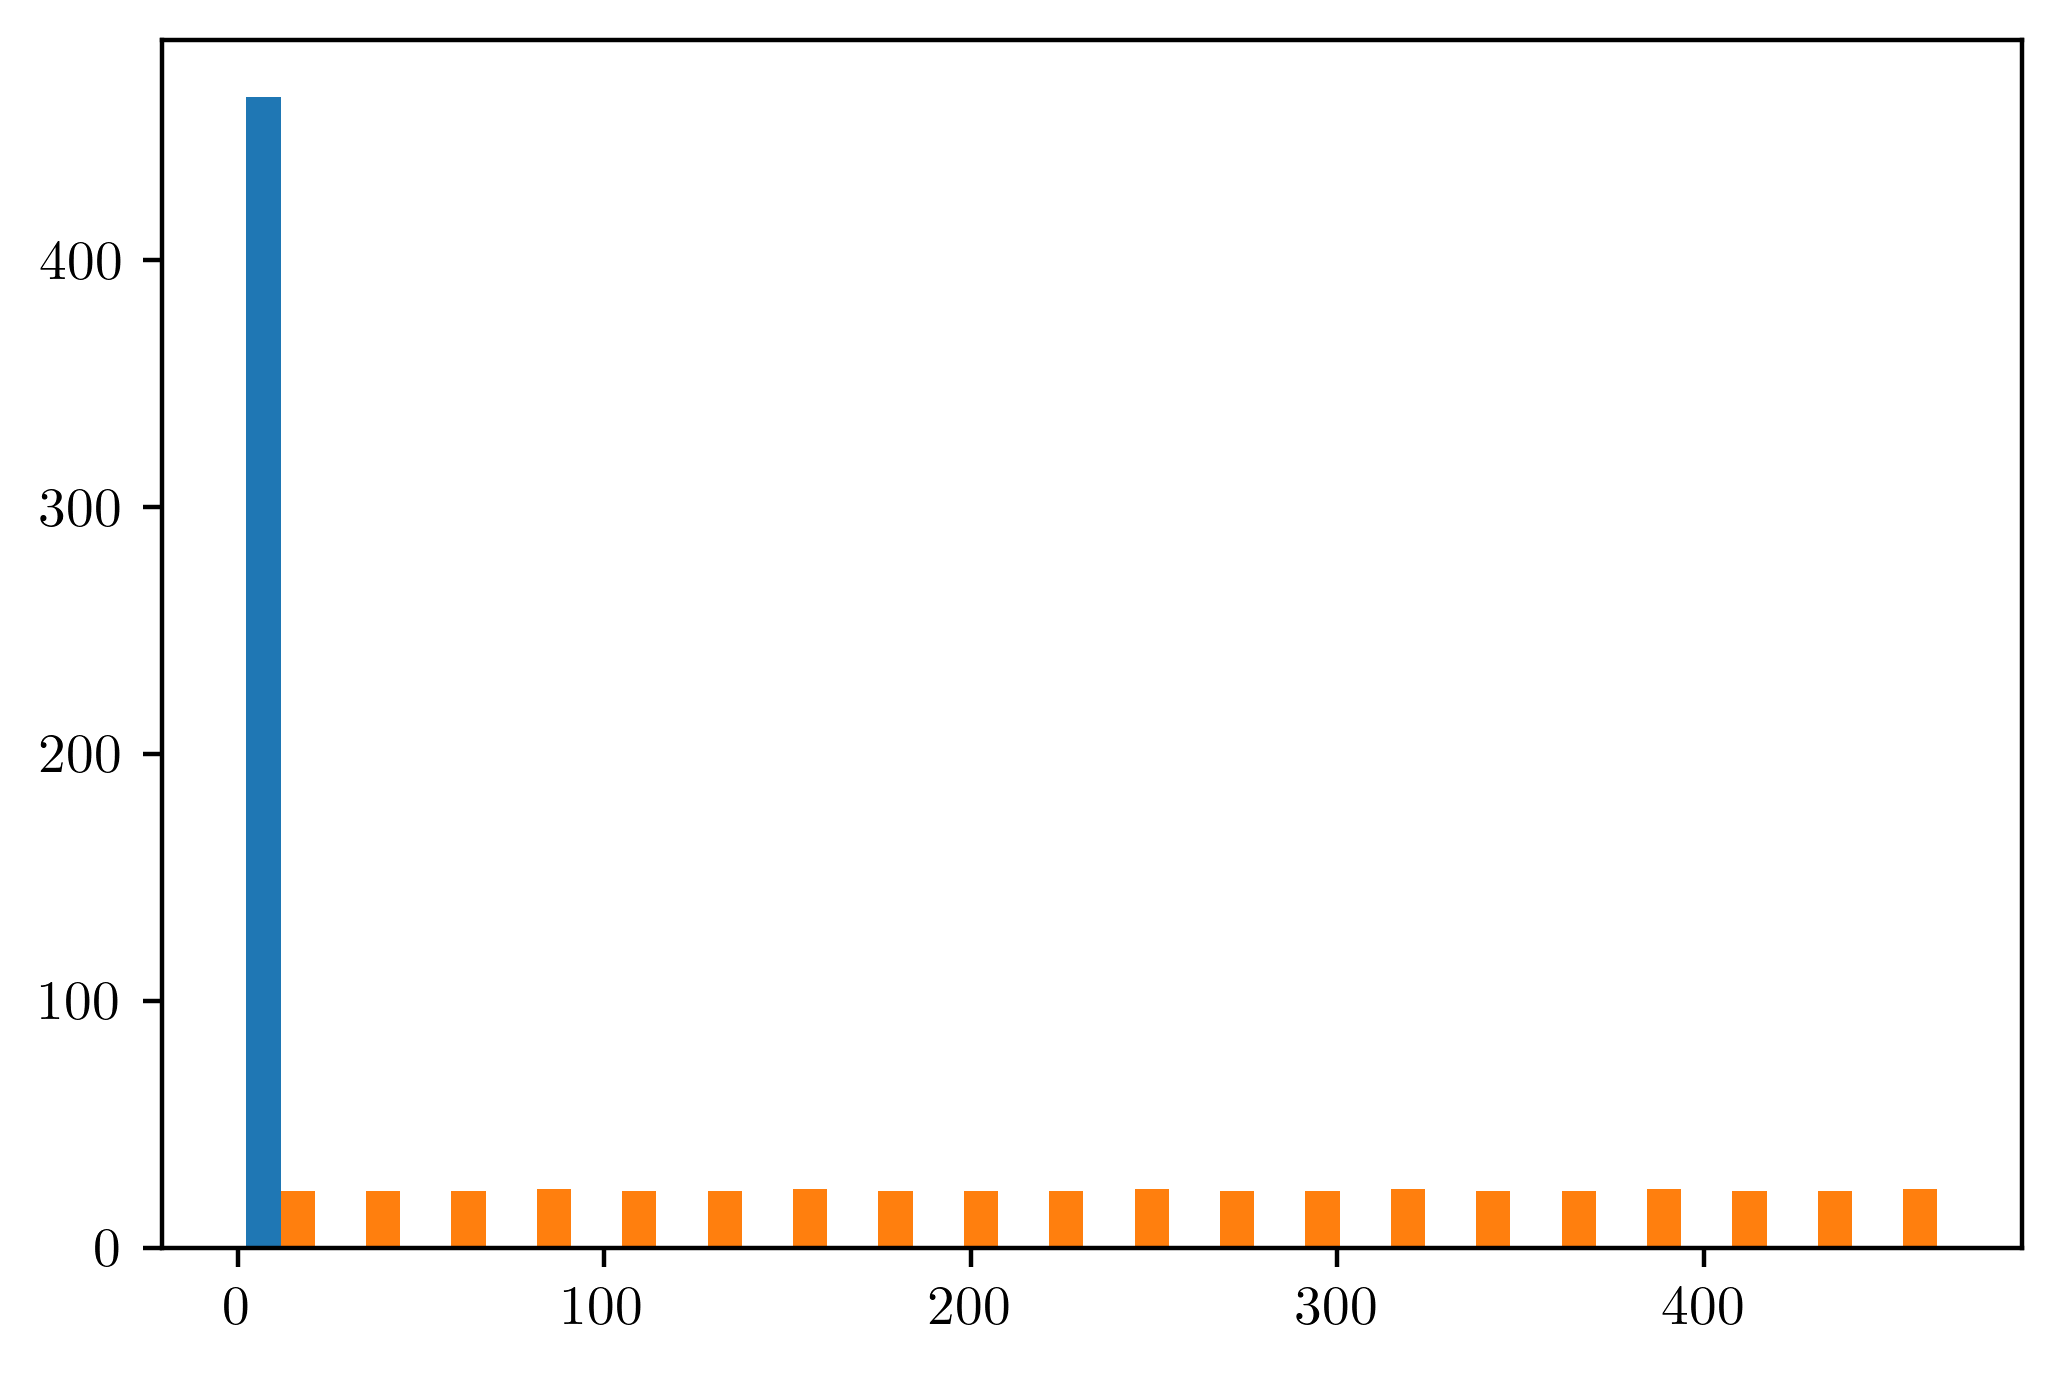

In [187]:
t_zero = np.nonzero(t_zero)
plt.hist(t_zero, bins=20)

# Case 2: Cross-correlation terms included 
## $C(\tau) = \sum_{i,j}\langle\vec{dp}_i(t_0)\cdot \vec{dp}_j(t_0+\tau) \rangle$


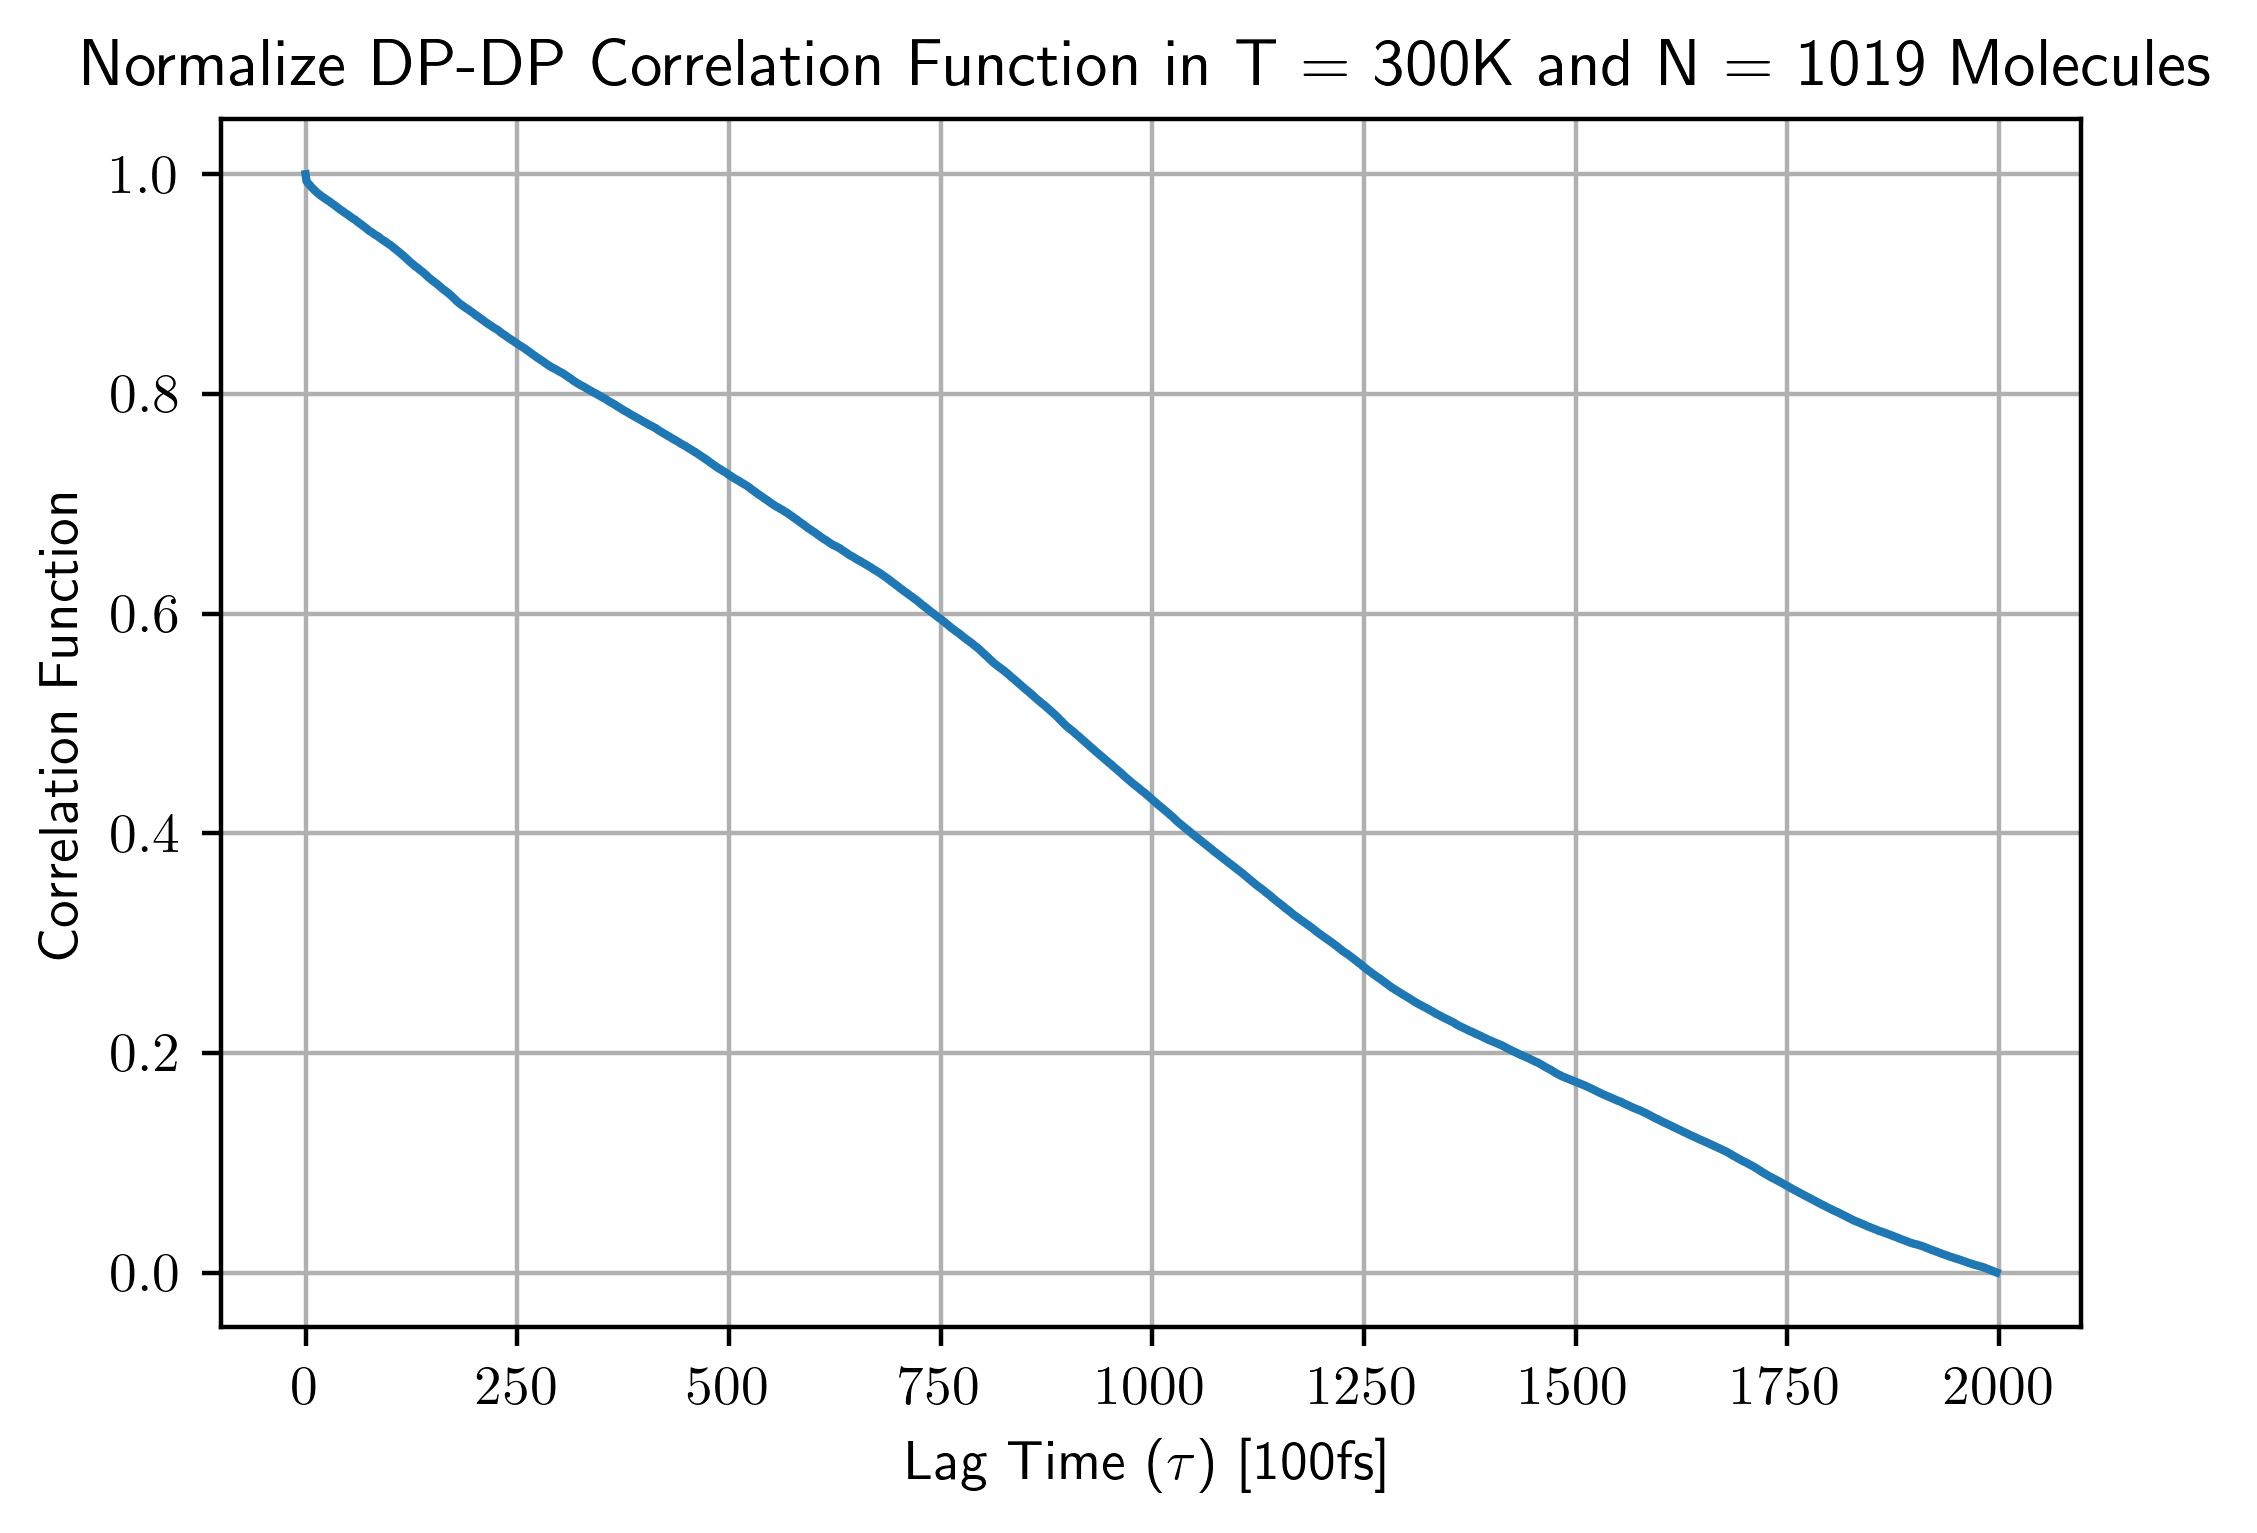

In [142]:
from scipy.signal import correlate
import matplotlib.pyplot as plt

corr_atom = np.zeros(N_step)

dipole_x = np.sum(dipole_matrix[:,:,0],axis = 1)
dipole_y = np.sum(dipole_matrix[:,:,1],axis = 1)
dipole_z = np.sum(dipole_matrix[:,:,2],axis = 1)

#dipole_abs = array_i[:,0] #np.sqrt(array_i[:,0]**2 + array_i[:,1]**2 + array_i[:,2]**2)#
#print(dipole_abs.shape)
#dipole_i = dipole_i_x + dipole_i_y + dipole_i_z
correlation_x = correlate(dipole_x, dipole_x, mode='full')
correlation_y = correlate(dipole_y, dipole_y, mode='full')
correlation_z = correlate(dipole_z, dipole_z, mode='full')
dipol_product_sqr = np.dot(dipole_x,dipole_x) + np.dot(dipole_y,dipole_y) + np.dot(dipole_z,dipole_z) 

correlation = (correlation_x + correlation_y + correlation_z)/dipol_product_sqr
corr_atom[:] = correlation[N_step - 1:2*N_step + 1]
corr_range = range(len(np.log((corr_atom[:]))))
#plt.plot(range(len(corr_atom[:])),np.log(corr_atom))
#plt.plot(corr_range,np.log(corr_atom))

plt.plot(corr_atom)
#plt.plot(corr_atom[:],scalex= loglog, scaley=loglog)
#print(correlation.shape)
#corr_atom = np.array(corr_atom)
#corr = np.mean(corr_atom, axis = 0)

    

np.savetxt('corr_croos_300.txt',corr_atom)  
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
plt.rcParams['text.usetex'] = True
plt.xlabel('Lag Time ($\\tau$) [100fs]')
plt.ylabel('Correlation Function')
plt.title('Normalize DP-DP Correlation Function in T = 300K and N = '+str(int(numer_of_selected_atoms/3))+' Molecules')
plt.grid(True)
plt.show()

    #corr_atom.append(correlation)
#plt.plot(np.mean(corr_atom))

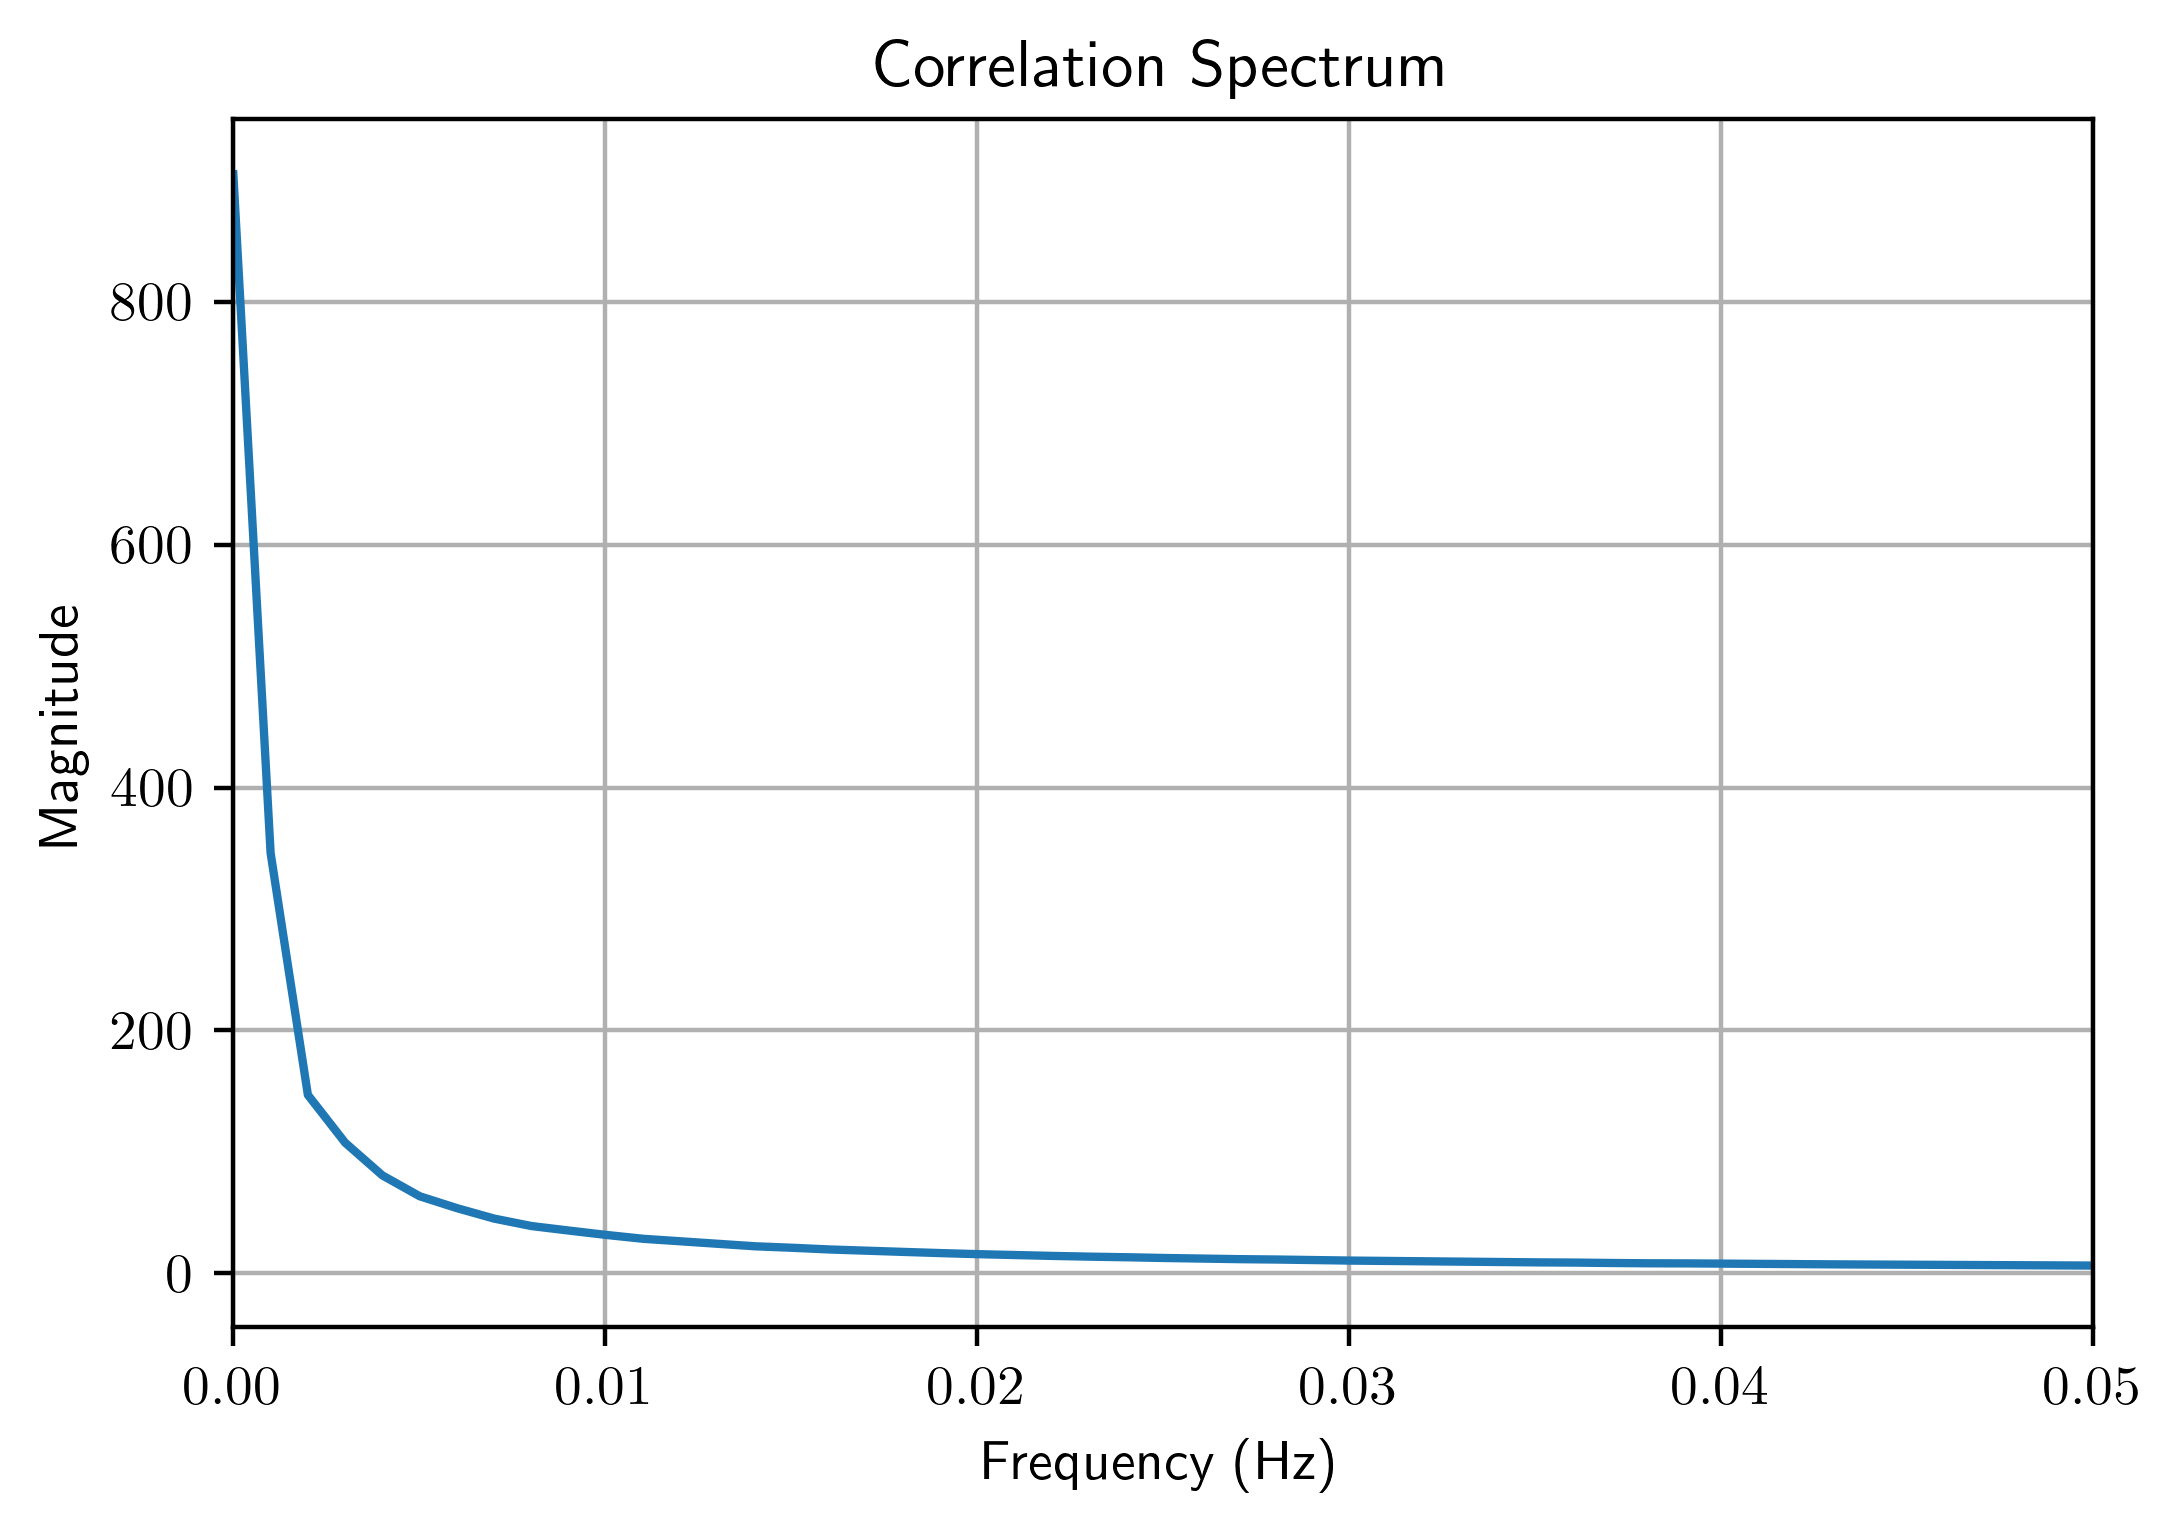

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your actual time series of correlation functions
# For demonstration purposes, let's generate a random time series
correlation_time_series = corr_atom#correlation[3800:0:-1]
total_lags = len(corr)#correlation[3800:0:-1])

# Apply Fast Fourier Transform (FFT)
correlation_spectrum = np.fft.fft(correlation_time_series)

# Calculate the corresponding frequency values
sampling_rate = 1.0  # Adjust this if your time series has a different sampling rate
frequencies = np.fft.fftfreq(total_lags, d=1/sampling_rate)

size_freq = len(frequencies)//2

# Plot the spectrum
plt.plot(frequencies[:size_freq], np.abs(correlation_spectrum)[:size_freq])
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Correlation Spectrum")
plt.grid(True)
plt.xlim([0,0.05])
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#numer_of_selected_atoms = 10
# Convert the dipole vectors dictionary to a NumPy array
dipole_vectors_array = {}
for timestep, vectors in dipole_vectors.items():
    #if timestep % 50 == 0:

    dipole_vectors_array[timestep] = np.array(vectors)


# Calculate the inner products of dipole vectors for each time step
dot_products = {}
for timestep, vectors in dipole_vectors_array.items():
    #if timestep % 50 == 0:

    dot_products[timestep] = np.dot(vectors, vectors.T)

# Calculate the correlation function for different lag times (\tau)
def calculate_correlation(tau):
    correlation = []
    print(tau)
    for timestep, dot_product in dot_products.items():
        #if timestep % 10 == 0:
        timestep_tau = timestep + tau
        #print(timestep_tau)
        #if timestep_tau in dot_products:
        #if timestep_tau < len(dipole_vectors_array):
        #if dipole_vectors_array[timestep_tau] != None:
        if timestep_tau < total_time_steps_limit - 10:
            corr = np.mean(dipole_vectors_array[timestep] * dipole_vectors_array[timestep_tau]) / dot_product
            correlation.append(corr)
    return np.mean(correlation)

# Define the range of lag times (\tau) you're interested in
tau_values = range(0, 000,50)  # Adjust the range as needed

# Calculate the correlation function for each lag time
correlation_function = [calculate_correlation(tau) for tau in tau_values]

# Plot the correlation function
plt.plot(tau_values, correlation_function, marker='o')
plt.xlabel('Lag Time (tau) [5fs]')
plt.ylabel('Normalized Correlation')
plt.title('Normalized DP-DP Correlation Function in T = 300K and N = '+str(int(numer_of_selected_atoms/3))+' Molecules')
plt.grid(True)
plt.show()

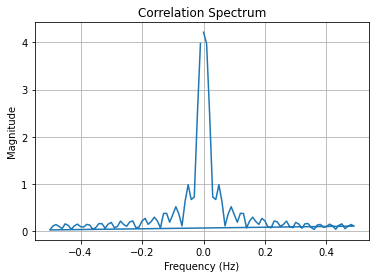

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Replace this with your actual time series of correlation functions
# For demonstration purposes, let's generate a random time series
correlation_time_series = correlation_function
total_lags = len(correlation_function)

# Apply Fast Fourier Transform (FFT)
correlation_spectrum = np.fft.fft(correlation_time_series)

# Calculate the corresponding frequency values
sampling_rate = 1.0  # Adjust this if your time series has a different sampling rate
frequencies = np.fft.fftfreq(total_lags, d=1/sampling_rate)

# Plot the spectrum
plt.plot(frequencies, np.abs(correlation_spectrum))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Correlation Spectrum")
plt.grid(True)
plt.show()


In [ ]:
for j in range(0, num_mol):
  x = A[3*j+0, t_start : ]
  y = A[3*j+1, t_start : ]
  z = A[3*j+2, t_start : ]
  xyz2 = np.array([x[:],y[:],z[:]])
  xyz = np.transpose(xyz2)

  fs = 1/t_step_for_filt
  fc = 1/100
  # Apply butterworth filtering here to obtain the filtered vector (fx, fy, fz)
  [b,a] = signal.butter(2, fc/(fs/2))

  fxyz = np.zeros([len(x), 3])
  fxyz[:,0] = signal.filtfilt(b, a, x)
  fxyz[:,1] = signal.filtfilt(b, a, y)
  fxyz[:,2] = signal.filtfilt(b, a, z)

  sxyz = np.zeros([len(fxyz[:,0]), 3])
  sxyz[:,0] = smooth(fxyz[:,0], int(100./t_step))
  sxyz[:,1] = smooth(fxyz[:,1], int(100./t_step))
  sxyz[:,2] = smooth(fxyz[:,2], int(100./t_step))

  for ii in range (0, tim):
    sxyz[ii,:]=sxyz[ii,:]/np.sqrt(np.dot(sxyz[ii,:],sxyz[ii,:]))

  # Compute the velocity and dot product
  vxyz = np.zeros([len(fxyz[:,0])-1 , 3])
  vxyz[:,0] = np.diff(sxyz[:,0])
  vxyz[:,1] = np.diff(sxyz[:,1])
  vxyz[:,2] = np.diff(sxyz[:,2])

  sxyz_1 = np.zeros([len(fxyz[:,0])-1, 3])
  sxyz_1[:,0] = sxyz[:-1,0]
  sxyz_1[:,1] = sxyz[:-1,1]
  sxyz_1[:,2] = sxyz[:-1,2]

  qxyz = np.cross(sxyz_1, vxyz)

  for ii in range (0, len(qxyz)):
    qxyz[ii,:]=qxyz[ii,:]/np.sqrt(np.dot(qxyz[ii,:],qxyz[ii,:]))

	# Compute the dot product between consecutive frames as indication of change of geodesic.
  ah = np.zeros([len(qxyz)-1])

  for i in range (0, len(qxyz)-1):
    factor = np.dot(qxyz[i,:],qxyz[i,:])*np.dot(qxyz[i+1,:],qxyz[i+1,:])
    ah[i] = 1.0 - np.dot(qxyz[i,:],qxyz[i+1,:])/np.sqrt(factor)

    if(1e3*ah[i]>0.1):
      counts[j]+=1

    if(ah[i] <= threshold):
      ah[i] = 0.0

  l = argrelextrema(ah, np.greater)
  t = np.array(l)

  # change in jump of angle , change in the angle
  ang = np.zeros(int(len(l[0])))
  dt = np.zeros(int(len(l[0])))
  mol = np.zeros(int(len(l[0])))

  ang[0] = np.dot(xyz[t[0,0],:], xyz[0,:])/np.sqrt(np.dot(xyz[t[0,0],:],xyz[t[0,0],:])*np.dot(xyz[0,:],xyz[0,:]))
  ang[0] = np.arccos(ang[0])
  dt[0] = t[0,0]
  mol =  np.full(int(len(l[0])), j, dtype=int)

  for i in range(1, len(l[0])):
    ang[i] = np.dot(xyz[t[0,i],:],xyz[t[0,i-1],:])/np.sqrt( np.dot( xyz[t[0,i],:],xyz[t[0,i],:] ) * np.dot(xyz[t[0,i-1],:],xyz[t[0,i-1],:]) )
    ang[i] = np.arccos(ang[i])
    dt[i] = t[0,i]-t[0,i-1]

  ang = ang*(180/np.pi)

  b_ang.append(ang[:])
  b_dt.append(dt[:])
  b_time.append(t[0,:])
  b_mol.append(mol[:])

b_ang_array = []
b_dt_array = []
b_time_array = []
b_mol_array = []

for item in b_ang:
  for i in item:
    b_ang_array.append(i)

for item in b_dt:
  for i in item:
    b_dt_array.append(i * t_step)

for item in b_time:
  for i in item:
    b_time_array.append(i * t_step)

for item in b_mol:
  for i in item:
    b_mol_array.append(i)

tbs = np.array([b_ang_array[:], b_dt_array[:], b_time_array[:],b_mol_array[:]])
tbs_transpose = np.transpose(tbs)
tbs_sort = tbs_transpose[tbs_transpose[:,2].argsort()]
